# GRIP: The Spark Foundation
**Data science and Business Analyst Internship**

**Author name: Gazal Mukri**

**Task 2:predict the optimum number of clusters and represent it visually**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris = pd.DataFrame(dataset.data, columns = dataset.feature_names)
#print the first few rows
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# total no of rows and columns
iris.shape

(150, 4)

In [6]:
# check for null values
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:

X = dataset.data
y = dataset.target

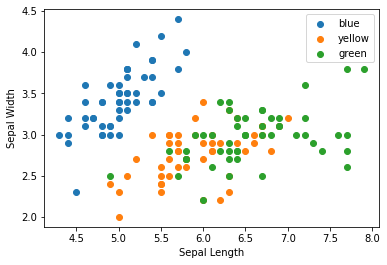

In [10]:
# between sepal length and width

plt.scatter(X[y == 0, 0], X[y == 0, 1], label = 'blue')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label = 'yellow')
plt.scatter(X[y == 2, 0], X[y == 2, 1], label = 'green')
plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

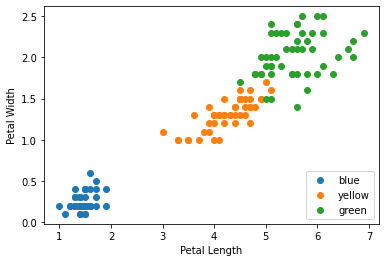

In [11]:
# between petal length and width

plt.scatter(X[y == 0, 2], X[y == 0, 3], label = 'blue')
plt.scatter(X[y == 1, 2], X[y == 1, 3], label = 'yellow')
plt.scatter(X[y == 2, 2], X[y == 2, 3], label = 'green')
plt.legend(loc='lower right') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# We can conclude that petal length and petal width are the better predictors since setosa is clearly seperable in latter case.

**Applying the K-Means Algorithm to find the optimum number of clusters**

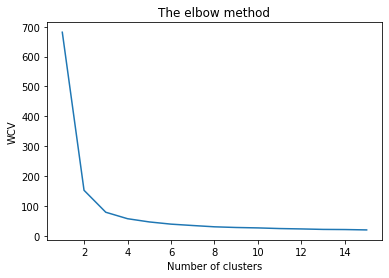

In [12]:
from sklearn.cluster import KMeans

# Experimenting with some values of 'K' to deduce the optimal value

wcv = [] # within cluster variation which helps to find the optimum no of clusters

for i in range(1, 16):
    km = KMeans(n_clusters = i)
    km.fit(X)
    wcv.append(km.inertia_) # calculates wcv

# Now plotting a graph which shows us the 'elbow' i.e. a point after the graph changes from exponential to linear
    
plt.plot(range(1, 16), wcv)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCV') # within cluster variation also known as within cluster sum of squares
plt.show()

In [13]:
# Creating the kmeans classifier
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [14]:
iris['clusters']=y_pred
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


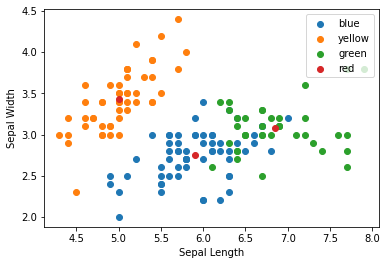

In [16]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], label = 'blue')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], label = 'yellow')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], label = 'green')

# Plotting the centroids.

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], label = 'red')
plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Visualizing the clusters of petal length and width

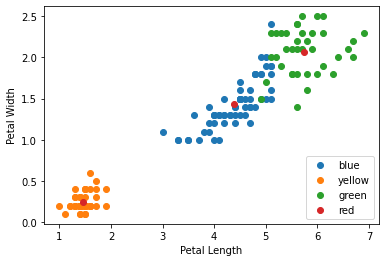

In [19]:
plt.scatter(X[y_pred == 0, 2], X[y_pred == 0, 3], label = 'blue')
plt.scatter(X[y_pred == 1, 2], X[y_pred == 1, 3], label = 'yellow')
plt.scatter(X[y_pred == 2, 2], X[y_pred == 2, 3], label = 'green')

# Plotting the centroids. This time we're going to use the cluster centres 

plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], label = 'red')
plt.legend(loc='lower right') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


# Conclusion: We are able to predict the optimum number of clusters i.e 3 and also visualize them with the help of scatter plot.